<a href="https://colab.research.google.com/github/rameenhamad/Developer_HUB_ML_Tasks/blob/main/1_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Developer_HUB_ML_Tasks/heart_disease_uci.csv")
data.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [ ]:
data.shape
data.drop_duplicates()
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


#Preprocessing

missing null values

In [ ]:
#for skewed data:
sekewed_columns = ['oldpeak', 'chol']
for col in sekewed_columns:
  data[col] = data[col].fillna(data[col].median())

In [ ]:
#remaining features
for col in data.columns:
  if data[col].dtype == "object":
      data[col] = data[col].fillna(data[col].mode()[0])
  elif data[col].dtype in ["float64", "int64"]:
      data[col] = data[col].fillna(data[col].mean())
  else:
    continue

/tmp/ipython-input-4257050756.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


Normalize numerical data

In [ ]:
columns_to_scale = [col for col in data.columns if data[col].dtype in["int64","float64"] and col != "num"]

scaler = MinMaxScaler()

for col in columns_to_scale:
    data[col] = scaler.fit_transform(data[[col]])

encoding categotical columns

In [ ]:
encoder = LabelEncoder()

for col in data.columns:
  if data[col].dtype in ["object"]:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
#target column
data['num'] = data['num'].apply(lambda x: 0 if x==0 else 1)
data.rename(columns={"dataset":"location", "num":"target"}, inplace=True)

#Exploratory Data Analysis (EDA)

data statistics

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    int64  
 3   location  920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  target    920 non-null    int64  
dtypes: bool(2), float64(7), int64(7)
memory usage: 102.6 KB


,id,age,sex,location,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.500000,0.520630,0.789130,1.238043,0.782609,0.660662,0.331524,0.990217,0.546096,0.392416,1.152174,0.225458,1.158696,0.553261
std,0.289146,0.192341,0.408148,1.130673,0.956350,0.092219,0.180829,0.631863,0.177032,0.120233,0.516007,0.180556,0.483493,0.497426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.387755,1.000000,0.000000,0.000000,0.600000,0.294776,1.000000,0.422535,0.295455,1.000000,0.225458,1.000000,0.000000
50%,0.500000,0.530612,1.000000,1.000000,0.000000,0.650000,0.369818,1.000000,0.549296,0.352273,1.000000,0.225458,1.000000,1.000000
75%,0.750000,0.653061,1.000000,2.000000,2.000000,0.700000,0.442786,1.000000,0.676056,0.465909,1.000000,0.225458,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000


orrelation heatmap

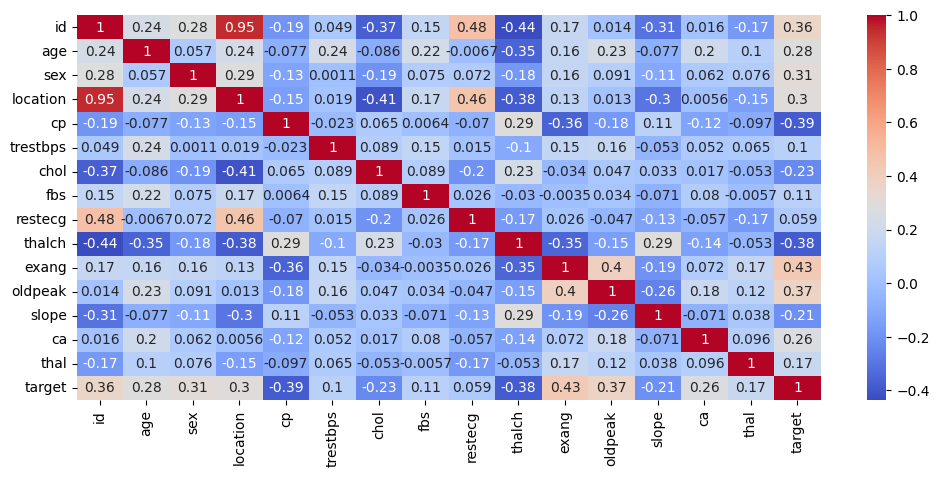

In [ ]:
coorelation = data.corr()

plt.figure(figsize=(12,5))
sns.heatmap(coorelation, annot=True, cmap="coolwarm")
plt.show()

#model training

split dataset

In [ ]:
X = data.drop(["id","target"], axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

train model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lg = log_reg.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

lg_accuracy = accuracy_score(y_test, y_pred_lg)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("accuracy with logistic model: ", lg_accuracy)
print("accuracy with random forest: ", rf_accuracy)

if lg_accuracy > rf_accuracy:
  print("Linear Regression is better solution!")
elif rf_accuracy > lg_accuracy:
  print("Random Forest is better solution!")
else:
  print("Both gives same results.")

accuracy with logistic model:  0.8206521739130435
accuracy with random forest:  0.8478260869565217
Random Forest is better solution!
